# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [15]:
import cv2
import os

import numpy as np
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

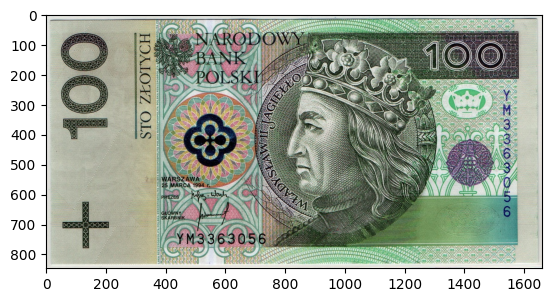

In [16]:
one_hundred_image = cv2.imread(fileName)
plt.imshow(one_hundred_image)

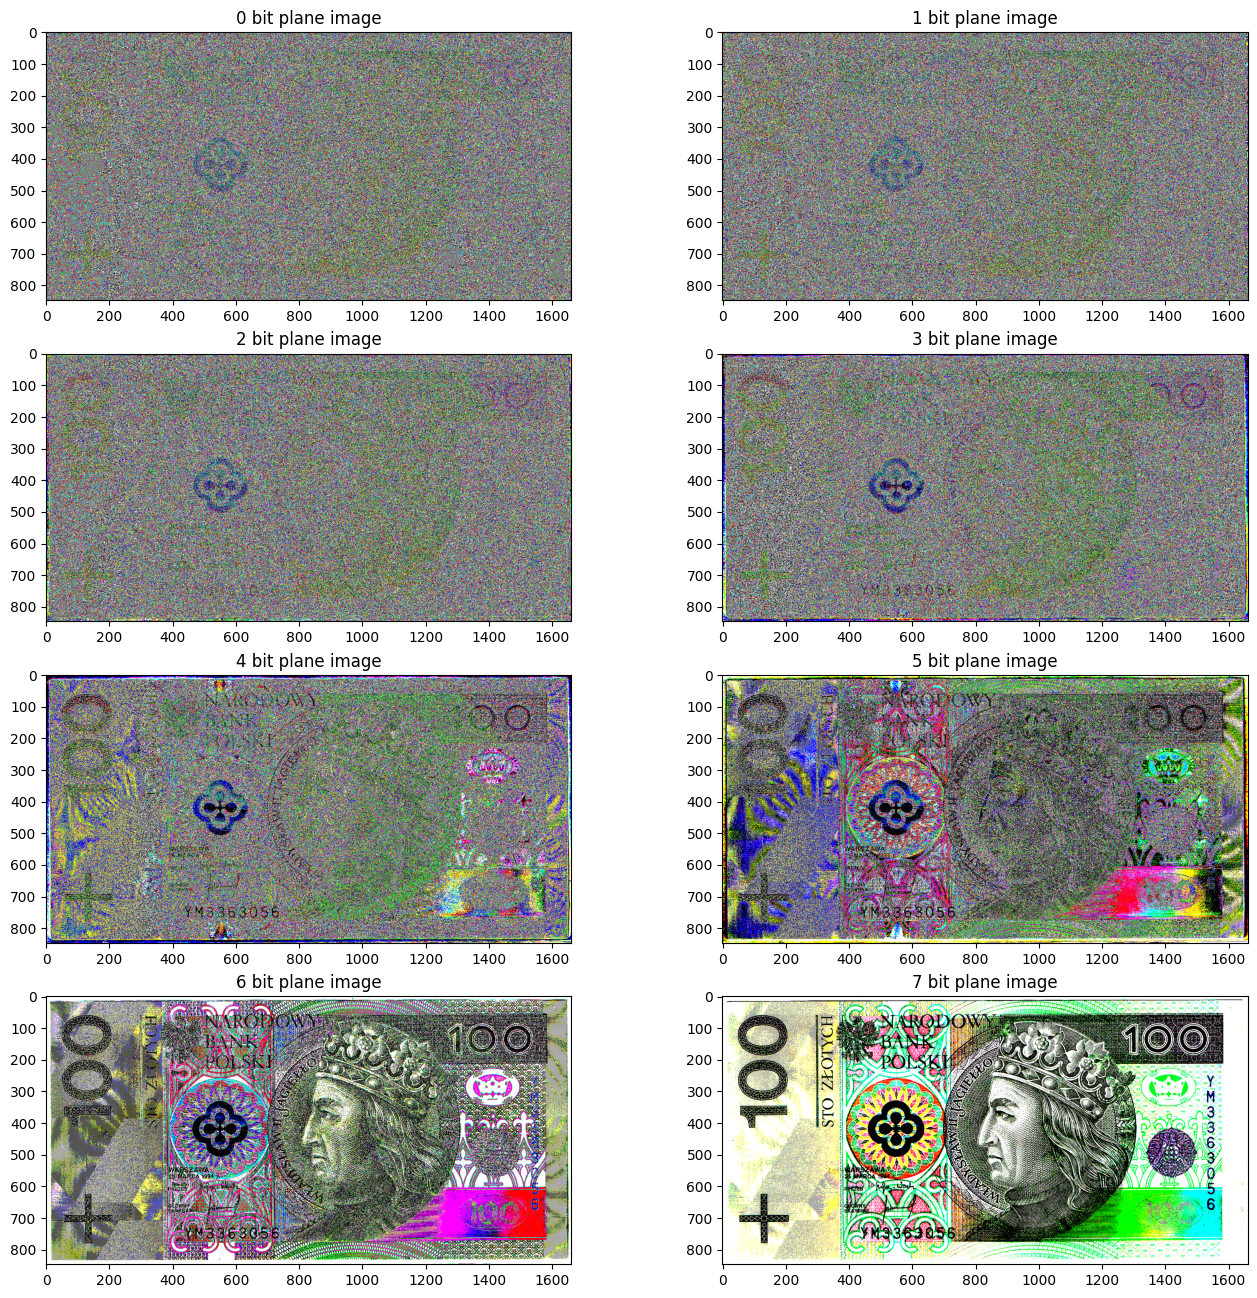

In [17]:


def scale_image_to_nth_bit(image:np.ndarray, bit_position:int) -> np.ndarray[int]:
    # 1 << (bit_position) == 2 ^ bit_position, but bits operation are faster
    bit_mask = 1 << bit_position
    
    # (image & bit_mask) -> if both number have 1 on the same positions  -> 1 else 0
    ##  >> (bit_position) ==  2 ^ -(bit_position)
    bit_plane =  (image & bit_mask) >> bit_position
   
    # Scale each bit to range [0, 255]
    bit_plane *= 255
    
    
    return bit_plane



def show_image_bit_planes(image: np.ndarray[int]) -> list[np.ndarray[int]]:
    bit_planes = [scale_image_to_nth_bit(image,bit_pos) for bit_pos in range(8)]
    f, axes= plt.subplots(4, 2, figsize = (16, 16))
    for idx, image in enumerate(bit_planes):
        row = idx // 2
        col = idx % 2
        axes[row, col].imshow(image)
        axes[row, col].set_title(f'{idx} bit plane image')
        
    return bit_planes
        
image_bit_planes = show_image_bit_planes(one_hundred_image)
        

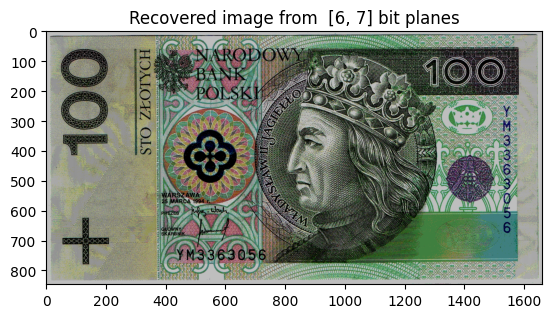

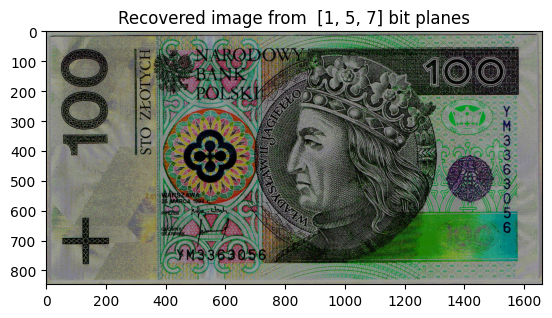

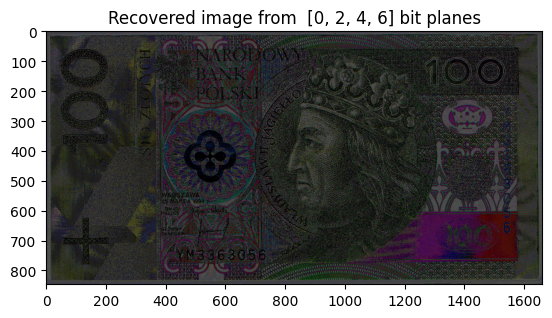

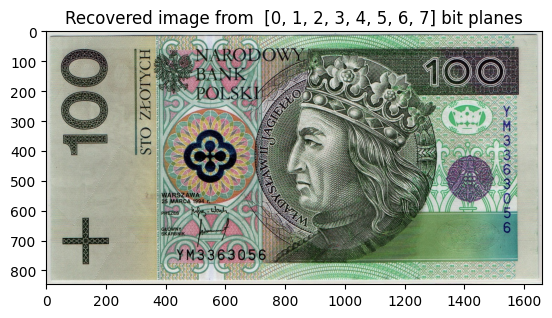

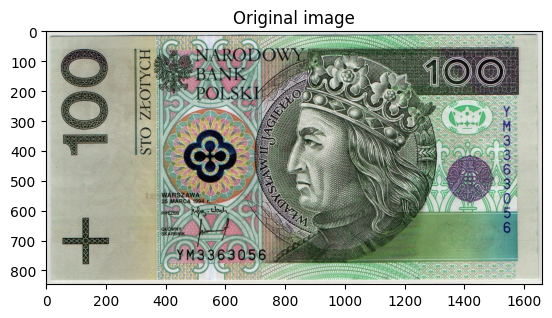

In [14]:

def recover_image(bit_planes: np.ndarray[int], planes_numbers: list[int]) -> None:
    #bit_planes[i] >> (8-i)) switch each bit of plane to its original bits position
    recovered_img = np.sum([(bit_planes[i] >> (8-i)) for i in planes_numbers], axis= 0)
    
    plt.imshow(recovered_img)
    plt.title(f'Recovered image from  {planes_numbers} bit planes')
    plt.show()
        

recover_image(image_bit_planes, [6, 7])
recover_image(image_bit_planes, [1, 5, 7])
recover_image(image_bit_planes, [0, 2, 4, 6])
recover_image(image_bit_planes, [x for x in range(8)])
plt.imshow(one_hundred_image)
plt.title('Original image')
plt.show()

